In [124]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import preproccessing as prep
from evaluation import show_scenarios_evaluation
from regime_switching_brownian_motion import RegimeSwitching
from independent_lognormal_model import IndependentLogNormal
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
sp500 = prep.loadStooqData('^spx','1975-12-01','m')
sp500_ret = prep.log_returns(sp500)
prep.assets_performance(sp500_ret)

Annualised Mean     0.0827
Annualised Sigma    0.1523
Skew               -0.7843
Kurtosis            2.5959
Sharp_ratio         1.1982
Max drowdawn       -0.5256
dtype: float64

<AxesSubplot:xlabel='Data'>

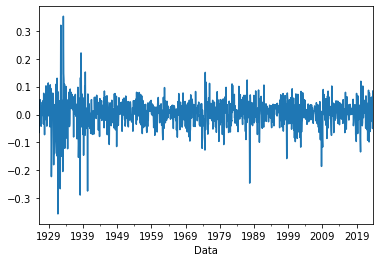

In [5]:
sp500_ret.plot()

<AxesSubplot:xlabel='Data'>

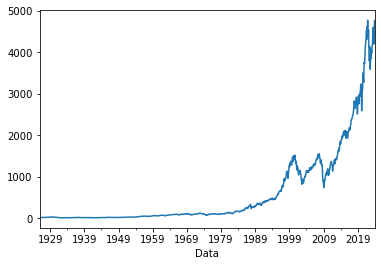

In [6]:
sp500.plot()

<AxesSubplot:xlabel='Data'>

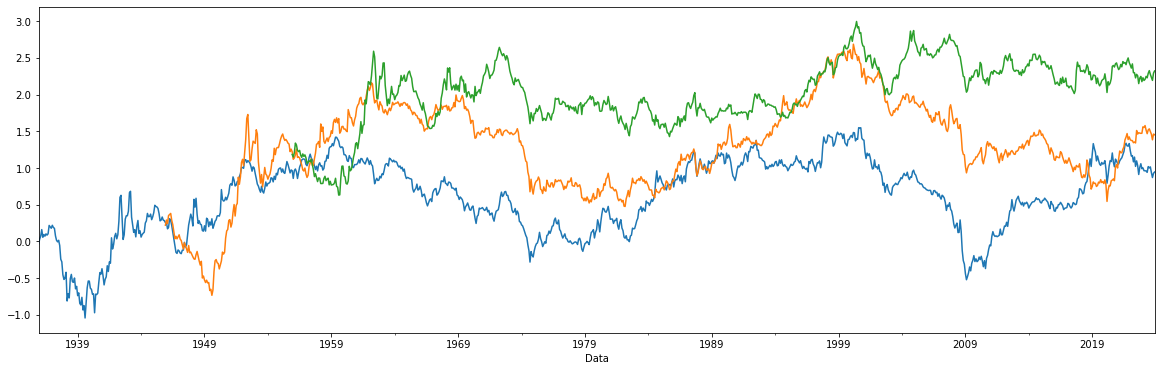

In [18]:
a10y = sp500_ret.rolling(120).sum().dropna() 
a20y = sp500_ret.rolling(240).sum().dropna() 
a30y = sp500_ret.rolling(360).sum().dropna() 
fig, ax = plt.subplots(figsize=(20,6))
a10y.plot()
a20y.plot()
a30y.plot()

In [89]:
pd.options.display.float_format = '{:,.4f}'.format

df = pd.concat([a10y,a20y,a30y], axis=1, keys=['10y', '20y', '30y'])
df = np.exp(df).pow([1/10,1/20,1/30])-1
df.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95])

,10y,20y,30y
count,"1,057.0000",937.0000,817.0000
mean,0.0642,0.0668,0.0699
std,0.0528,0.0323,0.0157
min,-0.0990,-0.0360,0.0213
5%,-0.0295,0.0034,0.0368
10%,-0.0034,0.0309,0.0534
25%,0.0266,0.0446,0.0608
50%,0.0706,0.0689,0.0712
75%,0.1082,0.0902,0.0807
90%,0.1223,0.1014,0.0882


In [154]:
models = [
    sm.tsa.ar_model.AutoReg(sp500_ret,lags=1),
    sm.api.tsa.MarkovRegression(sp500_ret,2,switching_variance=True),
    sm.api.tsa.MarkovRegression(sp500_ret,3,switching_variance=True),
    sm.api.tsa.MarkovRegression(sp500_ret,4,switching_variance=True),
    sm.tsa.regime_switching.markov_autoregression.MarkovAutoregression(sp500_ret,k_regimes=3,order=1,switching_ar=False,switching_variance=True),
    sm.tsa.regime_switching.markov_autoregression.MarkovAutoregression(sp500_ret,k_regimes=4,order=1,switching_ar=False,switching_variance=True)
]

results = []

for model in models:
    res = model.fit()
    results.append({
    'llf': res.llf,
    'aic': res.aic,
    'bic': res.bic    
})



pd.DataFrame(results, index=['AR','regime2','regime3','regime4', 'ARregime3', 'ARregime4'])



c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-p

,llf,aic,bic
AR,983.3876,"-1,960.7752","-1,947.7121"
regime2,"1,018.3141","-2,024.6281","-1,998.4915"
regime3,"1,025.7987","-2,027.5974","-1,975.3241"
regime4,"1,038.9364","-2,037.8728","-1,950.7506"
ARregime3,"1,034.7762","-2,043.5524","-1,986.9456"
ARregime4,"1,041.9568","-2,041.9136","-1,950.4719"


In [152]:
resk4 =  sm.api.tsa.MarkovRegression(sp500_ret,3,switching_variance=True).fit()
resk4.summary()

c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:             Zamkniecie   No. Observations:                 1176
Model:               MarkovRegression   Log Likelihood                1985.994
Date:                Wed, 27 Dec 2023   AIC                          -3947.988
Time:                        23:10:19   BIC                          -3887.149
Sample:                    01-31-1926   HQIC                         -3925.047
                         - 12-31-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.002      6.189      0.000       0.008       0.015
sigma2         0.0005   7.65e-05      6.620      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.002      4.399      0.000       0.004       0.010
sigma2         0.0019      0.000     14.396      0.000       0.002       0.002
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0227      0.012     -1.959      0.050      -0.045    1.09e-05
sigma2         0.0141      0.002      6.406      0.000       0.010       0.018
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9481        nan        nan        nan         nan         nan
p[1->0]        0.0148      0.006      2.318      0.020       0.002       0.027
p[2->0]     5.834e-21        nan        nan        nan         nan         nan
p[0->1]        0.0519      0.019      2.774      0.006       0.015       0.089
p[1->1]        0.9735      0.009    111.633      0.000       0.956       0.991
p[2->1]        0.0822      0.037      2.217      0.027       0.010       0.155
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [150]:
params = resk4.params

""" params =params * 100
params['const[0]'] = params['const[0]'] #* 12
params['const[1]'] = params['const[1]'] #* 12
params['const[2]'] = params['const[2]'] #* 12
params['const[3]'] = params['const[3]'] #* 12

params['sigma2[0]'] = np.sqrt(params['sigma2[0]'])
params['sigma2[1]'] = np.sqrt(params['sigma2[1]'])
params['sigma2[2]'] = np.sqrt(params['sigma2[2]'])
params['sigma2[3]'] = np.sqrt(params['sigma2[3]']) """

params

p[0->0]      0.8799
p[1->0]      0.7419
p[2->0]      0.0175
p[3->0]      0.0008
p[0->1]      0.0000
p[1->1]      0.0024
p[2->1]      0.3169
p[3->1]      0.0625
p[0->2]      0.1200
p[1->2]      0.2556
p[2->2]      0.6411
p[3->2]      0.0002
const[0]     0.1555
const[1]     0.7517
const[2]    -0.2650
const[3]    -0.2473
sigma2[0]   11.1325
sigma2[1]   11.5581
sigma2[2]   11.5581
sigma2[3]   11.5581
dtype: float64

In [11]:
usdpln = prep.loadStooqData('usdpln','2002-12-01','m')
#usdpln = usdpln.resample('BM').last()
usdpln_ret = prep.log_returns(usdpln)
usdpln_ret.name = 'usdpln'
usdpln_ret.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 252 entries, 2003-01-31 to 2023-12-31
Series name: usdpln
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


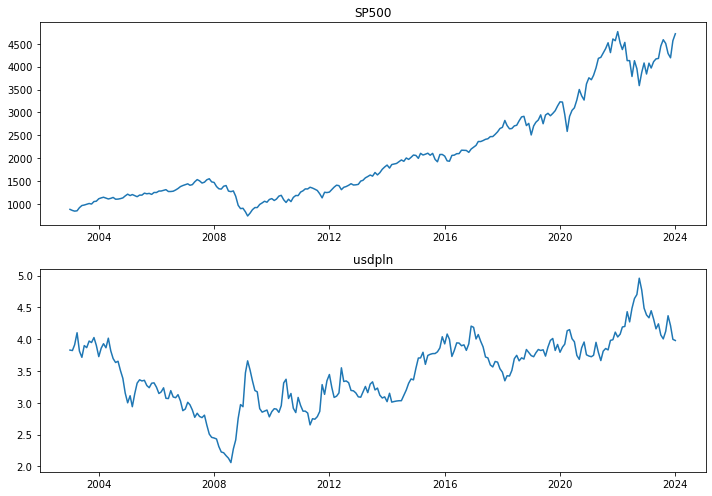

In [33]:
fig, axes = plt.subplots(2, figsize=(10, 7))

ax = axes[0]
ax.plot(sp500)
ax.set(title="SP500")

ax = axes[1]
ax.plot(usdpln)
ax.set(title="usdpln")


fig.tight_layout()

<AxesSubplot:xlabel='Data'>

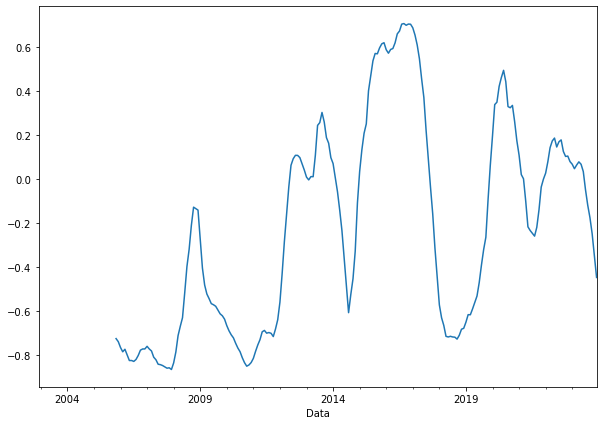

In [37]:
sp500.rolling(36).corr(usdpln).plot(figsize=(10,7))


In [22]:
n_regimes = 3

In [23]:
model = sm.tsa.MarkovRegression(
    sp500_ret,
    k_regimes=n_regimes,
    switching_variance=True,
    freq=None
    )
result_sp500 = model.fit()

c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [24]:
model = sm.tsa.MarkovRegression(
    usdpln_ret,
    k_regimes=n_regimes,
    switching_variance=True,
    freq=None
    )
result_usdpln = model.fit()

c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
result_sp500.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:             Zamkniecie   No. Observations:                  252
Model:               MarkovRegression   Log Likelihood                 478.126
Date:                Mon, 18 Dec 2023   AIC                           -932.253
Time:                        21:57:20   BIC                           -889.900
Sample:                    01-31-2003   HQIC                          -915.211
                         - 12-31-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.002      6.588      0.000       0.009       0.017
sigma2         0.0006      0.000      5.975      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0778      0.007     10.982      0.000       0.064       0.092
sigma2         0.0003      0.000      2.068      0.039    1.81e-05       0.001
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0431      0.011     -4.095      0.000      -0.064      -0.022
sigma2         0.0024      0.001      3.648      0.000       0.001       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9275      0.026     36.295      0.000       0.877       0.978
p[1->0]        0.7522      0.164      4.594      0.000       0.431       1.073
p[2->0]     5.411e-09        nan        nan        nan         nan         nan
p[0->1]     1.899e-10        nan        nan        nan         nan         nan
p[1->1]        0.0708      0.085      0.833      0.405      -0.096       0.237
p[2->1]        0.3291      0.094      3.512      0.000       0.145       0.513
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [26]:
result_usdpln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 usdpln   No. Observations:                  252
Model:               MarkovRegression   Log Likelihood                 480.171
Date:                Mon, 18 Dec 2023   AIC                           -936.341
Time:                        21:57:20   BIC                           -893.988
Sample:                    01-31-2003   HQIC                          -919.299
                         - 12-31-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0384      0.006      6.330      0.000       0.027       0.050
sigma2         0.0001   9.43e-05      1.537      0.124   -3.99e-05       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0076      0.003     -2.428      0.015      -0.014      -0.001
sigma2         0.0008      0.000      7.405      0.000       0.001       0.001
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0094      0.009      1.027      0.304      -0.009       0.027
sigma2         0.0036      0.001      4.599      0.000       0.002       0.005
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     3.251e-21        nan        nan        nan         nan         nan
p[1->0]        0.1365      0.073      1.880      0.060      -0.006       0.279
p[2->0]    4.545e-139        nan        nan        nan         nan         nan
p[0->1]        1.0000        nan        nan        nan         nan         nan
p[1->1]        0.8563      0.073     11.697      0.000       0.713       1.000
p[2->1]        0.0318      0.032      1.001      0.317      -0.031       0.094
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

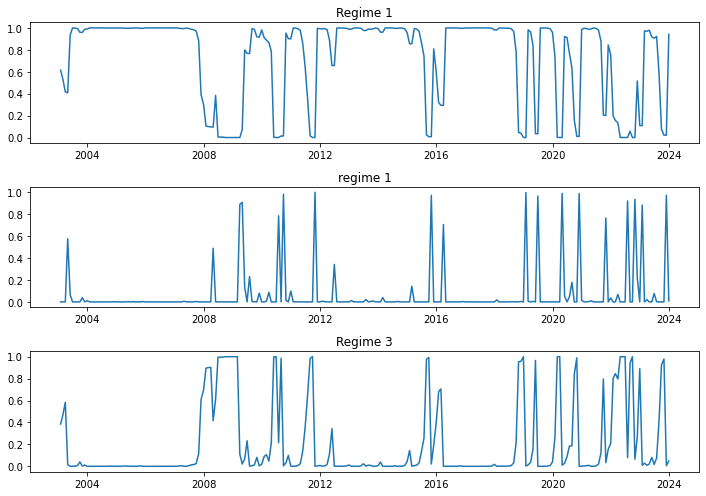

In [29]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(result_sp500.smoothed_marginal_probabilities[0])
ax.set(title="Regime 1")

ax = axes[1]
ax.plot(result_sp500.smoothed_marginal_probabilities[1])
ax.set(title="regime 1")

ax = axes[2]
ax.plot(result_sp500.smoothed_marginal_probabilities[2])
ax.set(title="Regime 3")

fig.tight_layout()

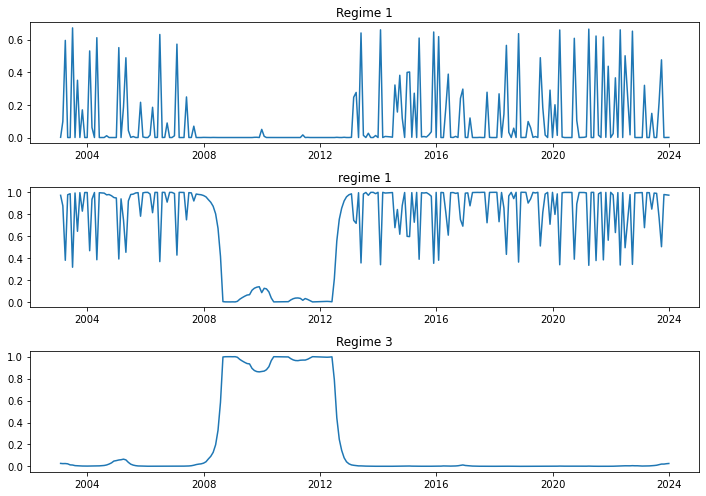

In [30]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(result_usdpln.smoothed_marginal_probabilities[0])
ax.set(title="Regime 1")

ax = axes[1]
ax.plot(result_usdpln.smoothed_marginal_probabilities[1])
ax.set(title="regime 1")

ax = axes[2]
ax.plot(result_usdpln.smoothed_marginal_probabilities[2])
ax.set(title="Regime 3")

fig.tight_layout()